In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report

In [2]:
df = pd.read_csv('50_Startups.csv')
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [4]:
df.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


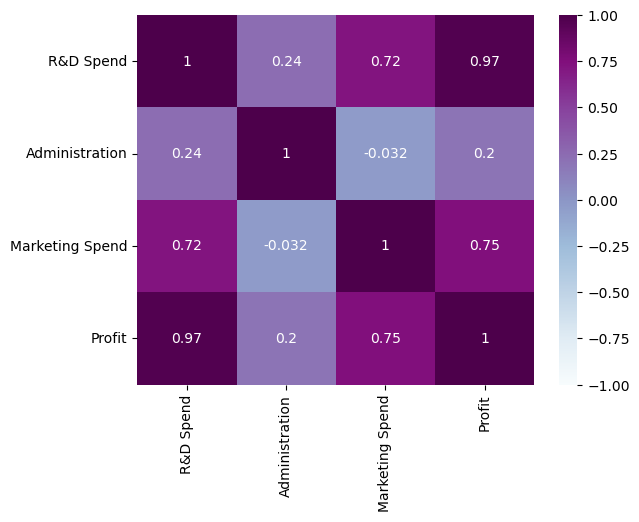

In [5]:
sns.heatmap(df.corr(),vmin = -1, vmax = 1, annot = True,cmap = 'BuPu')
plt.show()


Printing the Plot for Feature:  R&D Spend
***********************************


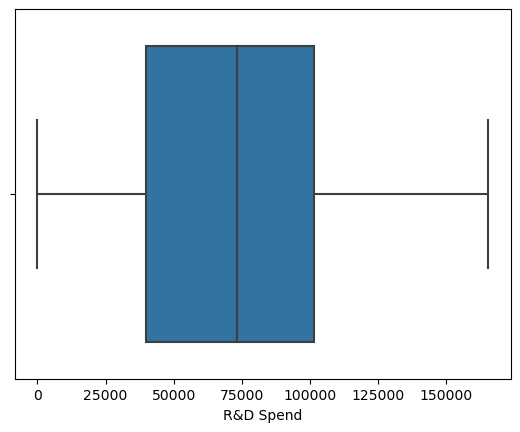


Printing the Plot for Feature:  Administration
***********************************


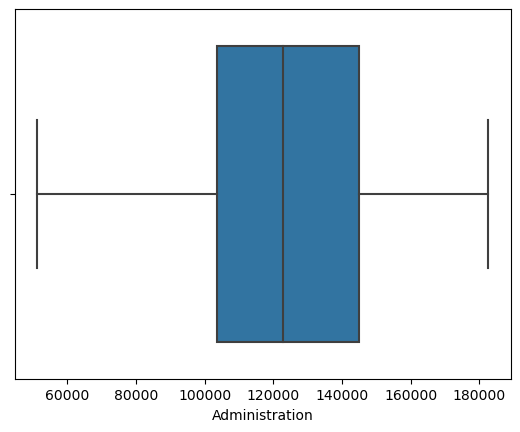


Printing the Plot for Feature:  Marketing Spend
***********************************


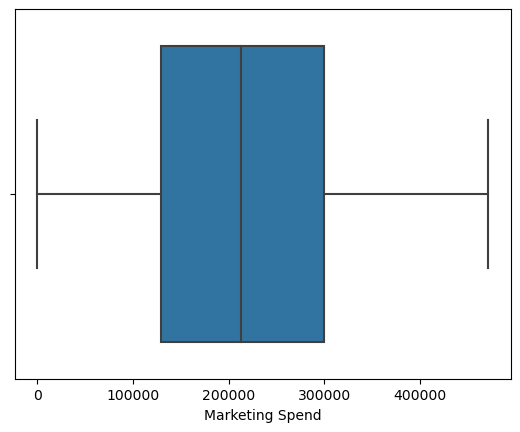


Printing the Plot for Feature:  Profit
***********************************


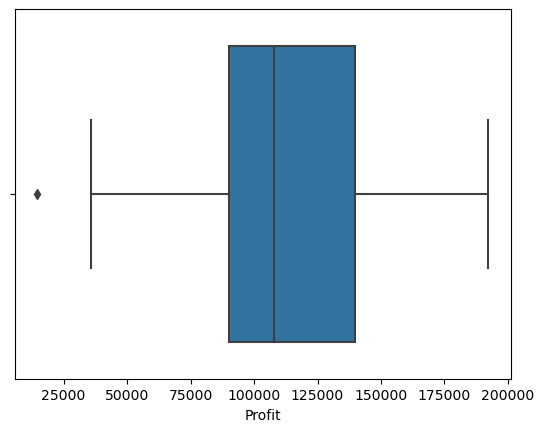

In [6]:
for i in df.columns:
        if df[i].dtype == 'int64' or df[i].dtype =='float64':
            print("\nPrinting the Plot for Feature: ", i)
            print("***********************************")
            sns.boxplot(x=i, data= df)
            plt.show()

In [7]:
import statsmodels.formula.api as smf

In [8]:
df.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

In [9]:
#Build model
myformula = 'Profit ~ Administration'
model = smf.ols(myformula,data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     2.015
Date:                Fri, 04 Aug 2023   Prob (F-statistic):              0.162
Time:                        10:19:46   Log-Likelihood:                -599.63
No. Observations:                  50   AIC:                             1203.
Df Residuals:                      48   BIC:                             1207.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       7.697e+04   2.53e+04      3.040      0.004    2.61e+04    1.28e+05
Administration     0.2887      0.203      1.419      0.162      -0.120       0.698
==============================================================================
Omnibus:                        0.126   Durbin-Watson:                   0.099
Prob(Omnibus):                  0.939   Jarque-Bera (JB):                0.110
Skew:                           0.093   Prob(JB):                        0.947
Kurtosis:                       2.866   Cond. No.                     5.59e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.59e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [10]:
df = pd.get_dummies(df,['State'])

In [11]:
df.head()

,R&D Spend,Administration,Marketing Spend,Profit,State_California,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0


In [12]:
X = df.drop(['Profit'], axis=1)
# the dependent variable
y = df[['Profit']]

In [13]:
X

,R&D Spend,Administration,Marketing Spend,State_California,State_Florida,State_New York
0,165349.20,136897.80,471784.10,0,0,1
1,162597.70,151377.59,443898.53,1,0,0
2,153441.51,101145.55,407934.54,0,1,0
3,144372.41,118671.85,383199.62,0,0,1
4,142107.34,91391.77,366168.42,0,1,0
5,131876.90,99814.71,362861.36,0,0,1
6,134615.46,147198.87,127716.82,1,0,0
7,130298.13,145530.06,323876.68,0,1,0
8,120542.52,148718.95,311613.29,0,0,1
9,123334.88,108679.17,304981.62,1,0,0


In [14]:
y

,Profit
0,192261.83
1,191792.06
2,191050.39
3,182901.99
4,166187.94
5,156991.12
6,156122.51
7,155752.60
8,152211.77
9,149759.96


In [15]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=0)

In [16]:
X_train.shape

(40, 6)

In [17]:
y_train.shape

(40, 1)

In [18]:
X_test.shape

(10, 6)

In [19]:
regression_model = LinearRegression()
regression_model.fit(X_train,y_train)

LinearRegression()

In [20]:
y_pred = regression_model.predict(X_test)
y_pred

array([[103015.20159796],
       [132582.27760816],
       [132447.73845174],
       [ 71976.09851258],
       [178537.48221055],
       [116161.24230165],
       [ 67851.69209676],
       [ 98791.73374687],
       [113969.43533012],
       [167921.0656955 ]])

In [21]:
pd.DataFrame(X_train,columns = X_train.columns)

,R&D Spend,Administration,Marketing Spend,State_California,State_Florida,State_New York
33,55493.95,103057.49,214634.81,0,1,0
35,46014.02,85047.44,205517.64,0,0,1
26,75328.87,144135.98,134050.07,0,1,0
34,46426.07,157693.92,210797.67,1,0,0
18,91749.16,114175.79,294919.57,0,1,0
7,130298.13,145530.06,323876.68,0,1,0
14,119943.24,156547.42,256512.92,0,1,0
45,1000.23,124153.04,1903.93,0,0,1
48,542.05,51743.15,0.00,0,0,1
29,65605.48,153032.06,107138.38,0,0,1


In [22]:
y_pred_train  = regression_model.predict(X_train)
y_pred_train

array([[ 95764.42320496],
       [ 89164.62849777],
       [109506.72329085],
       [ 91366.2188941 ],
       [127111.48666646],
       [159019.04337114],
       [148905.9881254 ],
       [ 48179.60744028],
       [ 45374.34722508],
       [102951.9596798 ],
       [145449.63178399],
       [ 96684.71387299],
       [ 97535.3576194 ],
       [116571.15139254],
       [ 69421.13311312],
       [116212.62095133],
       [ 60736.53267612],
       [152787.95464277],
       [127413.0337311 ],
       [102210.16391827],
       [161822.7226407 ],
       [131583.61511491],
       [ 75019.09161337],
       [ 48054.91969394],
       [189547.28196893],
       [127528.92248422],
       [ 85540.50570954],
       [111255.8251405 ],
       [156191.10124356],
       [108464.25100331],
       [ 75306.81185049],
       [119915.38726755],
       [115144.58914955],
       [152688.90677959],
       [ 81513.47163492],
       [ 57298.28613018],
       [172852.28336637],
       [192919.57537462],
       [ 470

In [23]:
r2_score(y_train,y_pred_train)

0.9501847627493607

In [24]:
r2_score(y_test,y_pred)

0.9347068473282424

it is very Good model scored around  0.9347068473282424

In [25]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=0)
regression_model = LinearRegression()
regression_model.fit(X_train,y_train)
y_pred = regression_model.predict(X_test)
y_pred

array([[103015.20159796],
       [132582.27760816],
       [132447.73845174],
       [ 71976.09851258],
       [178537.48221055],
       [116161.24230165],
       [ 67851.69209676],
       [ 98791.73374687],
       [113969.43533012],
       [167921.0656955 ]])

In [33]:
print(y_test,y_pred)

       Profit
28  103282.38
11  144259.40
10  146121.95
41   77798.83
2   191050.39
27  105008.31
38   81229.06
31   97483.56
22  110352.25
4   166187.94 [[103015.20159796]
 [132582.27760816]
 [132447.73845174]
 [ 71976.09851258]
 [178537.48221055]
 [116161.24230165]
 [ 67851.69209676]
 [ 98791.73374687]
 [113969.43533012]
 [167921.0656955 ]]


In [26]:
print(r2_score(y_test,y_pred))
print(r2_score(y_train,y_pred_train))

0.9347068473282424
0.9501847627493607


In [27]:
df.head()

,R&D Spend,Administration,Marketing Spend,Profit,State_California,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0


In [46]:
regression_model.predict([[125349.20 ,116897.80,901784.10,257798.83,0,3]])

C:\Users\ygred\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[22513907.7292068]])

In [27]:
df.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'Profit',
       'State_California', 'State_Florida', 'State_New York'],
      dtype='object')

Multicollinearity

In [28]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [29]:
variables = df[['R&D Spend', 'Administration', 'Marketing Spend', 'Profit',
       'State_California', 'State_Florida', 'State_New York']]
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(variables.values,i) for i in range(variables.shape[1])]
vif['features'] = variables.columns
vif

,VIF,features
0,19.604937,R&D Spend
1,1.184921,Administration
2,2.552858,Marketing Spend
3,20.305593,Profit
4,19.939371,State_California
5,19.779492,State_Florida
6,20.100087,State_New York


Residual Analysis

In [30]:
findcarpred = df.copy()

In [31]:
findcarpred

,R&D Spend,Administration,Marketing Spend,Profit,State_California,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0
5,131876.90,99814.71,362861.36,156991.12,0,0,1
6,134615.46,147198.87,127716.82,156122.51,1,0,0
7,130298.13,145530.06,323876.68,155752.60,0,1,0
8,120542.52,148718.95,311613.29,152211.77,0,0,1
9,123334.88,108679.17,304981.62,149759.96,1,0,0


In [32]:
findcarpred['ypred'] = regression_model.predict(X)

In [33]:
findcarpred['Error'] =findcarpred['Profit']-findcarpred['ypred']

In [34]:
findcarpred['Error']

0      -657.745375
1      2244.778031
2     12512.907789
3     10049.706634
4     -1733.125696
5     -4831.602641
6       -68.591244
7     -3266.443371
8      -576.184643
9     -2928.946780
10    13674.211548
11    11677.122392
12    14056.597516
13     6894.316269
14   -16303.338125
15   -15532.591784
16    10421.778607
17    -6213.245115
18    -2844.586666
19     7632.270850
20     2261.409049
21    -8602.367268
22    -3617.185330
23      269.738997
24    -2703.785140
25     5194.176082
26    -3773.183291
27   -11152.932302
28      267.178402
29    -1947.319680
30     3252.876127
31    -1308.173747
32     -107.517619
33     1014.496795
34     5346.581106
35     7314.881502
36    15401.378150
37     4408.634290
38    13377.367903
39     -507.711635
40     3220.818387
41     5822.731487
42     2077.356887
43     9022.447324
44     -635.664359
45    16746.472560
46    -7807.536130
47    -4447.897378
48    -9700.937225
49   -33373.519694
Name: Error, dtype: float64

In [35]:
findcarpred['Error'] = findcarpred['Profit']-findcarpred['ypred']

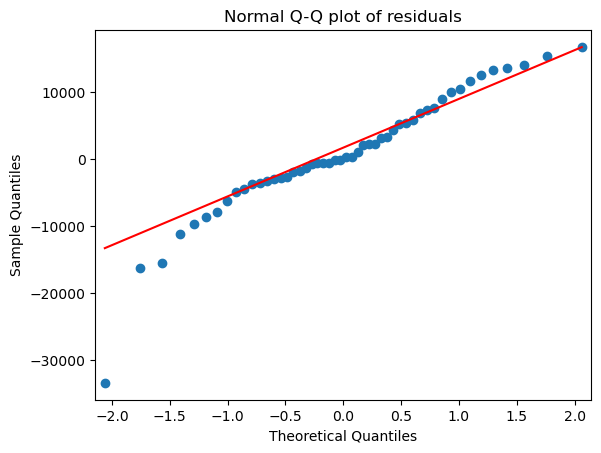

In [36]:
import statsmodels.api as sm
sm.qqplot(findcarpred['Error'],line='q') # line = 45 to draw the diagnoal line
plt.title("Normal Q-Q plot of residuals")
plt.show()

Model Deletion Techniques

In [37]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

In [38]:
len(df)

50

In [39]:
myrows = np.arange(df.shape[0])
myinfluence = np.round(c, 3) # y value

In [40]:
myrows

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])

In [41]:
myinfluence

array([0.05 , 0.075, 0.074, 0.034, 0.059, 0.028, 0.017, 0.016, 0.014,
       0.014, 0.01 , 0.024, 0.005, 0.003, 0.002, 0.002, 0.001, 0.   ,
       0.001, 0.   , 0.001, 0.002, 0.   , 0.   , 0.   , 0.001, 0.002,
       0.001, 0.033, 0.006, 0.001, 0.009, 0.002, 0.001, 0.013, 0.   ,
       0.004, 0.   , 0.008, 0.008, 0.007, 0.011, 0.014, 0.013, 0.054,
       0.015, 0.025, 0.045, 0.199, 0.062])

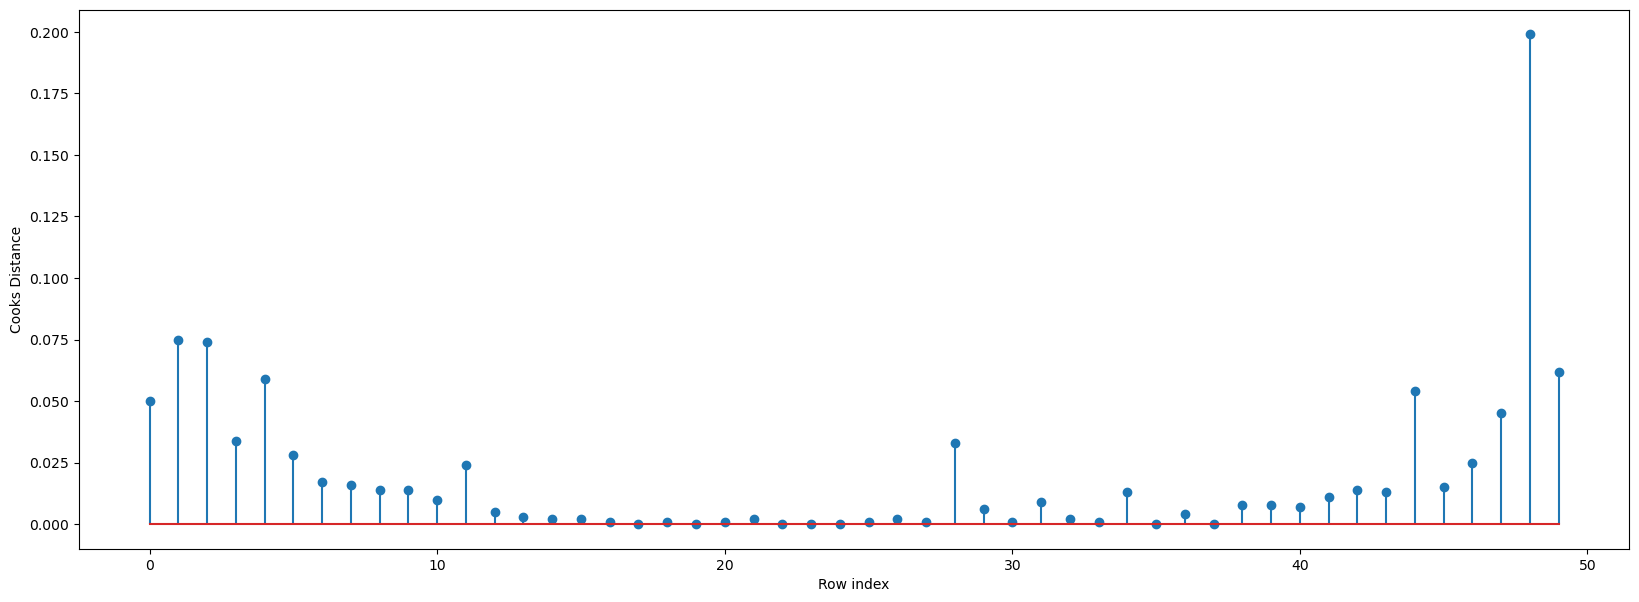

In [42]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(myrows, myinfluence)
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [43]:
#index and value of influencer
(np.argmax(c),np.max(c))

(48, 0.198819053697152)

In [44]:
## Below is for leverage cutoff
n = df.shape[0]
k = df.shape[1]
leverage_cutoff = 3*((k + 1)/n)
print(leverage_cutoff)

0.48


In [45]:
# obtain Cook's distance 
model_cooksd = model.get_influence().cooks_distance[0]

# get length of df to obtain n
n= df.shape[0]
critical_d = 4/n
print(n, critical_d)

50 0.08


In [46]:
print('Critical Cooks distance:', critical_d)
out_d = model_cooksd > critical_d

# output potential outliers with leverage
print(df.index[out_d], "\n", 
    model_cooksd[out_d])

Critical Cooks distance: 0.08
Int64Index([48], dtype='int64') 
 [0.19881905]


In [47]:
import pandas as pd

tc = pd.read_csv('ToyotaCorolla.csv', encoding='latin-1', error_bad_lines=False)
tc.head()

C:\Users\ygred\AppData\Local\Temp\ipykernel_5400\3137376317.py:3: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  tc = pd.read_csv('ToyotaCorolla.csv', encoding='latin-1', error_bad_lines=False)


,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


In [48]:
tc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                1436 non-null   int64 
 1   Model             1436 non-null   object
 2   Price             1436 non-null   int64 
 3   Age_08_04         1436 non-null   int64 
 4   Mfg_Month         1436 non-null   int64 
 5   Mfg_Year          1436 non-null   int64 
 6   KM                1436 non-null   int64 
 7   Fuel_Type         1436 non-null   object
 8   HP                1436 non-null   int64 
 9   Met_Color         1436 non-null   int64 
 10  Color             1436 non-null   object
 11  Automatic         1436 non-null   int64 
 12  cc                1436 non-null   int64 
 13  Doors             1436 non-null   int64 
 14  Cylinders         1436 non-null   int64 
 15  Gears             1436 non-null   int64 
 16  Quarterly_Tax     1436 non-null   int64 
 17  Weight        

In [49]:
df=tc.loc[:,("Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight")]
df.head()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Price          1436 non-null   int64
 1   Age_08_04      1436 non-null   int64
 2   KM             1436 non-null   int64
 3   HP             1436 non-null   int64
 4   cc             1436 non-null   int64
 5   Doors          1436 non-null   int64
 6   Gears          1436 non-null   int64
 7   Quarterly_Tax  1436 non-null   int64
 8   Weight         1436 non-null   int64
dtypes: int64(9)
memory usage: 101.1 KB


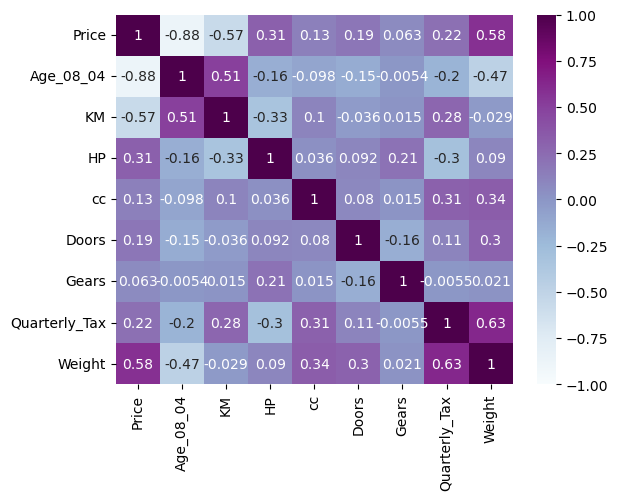

In [51]:
sns.heatmap(df.corr(),vmin = -1, vmax = 1, annot = True,cmap = 'BuPu')
plt.show()

In [52]:
X = df.drop(['Price'],axis = 1)
y = df['Price']
print(X,y)

      Age_08_04     KM   HP    cc  Doors  Gears  Quarterly_Tax  Weight
0            23  46986   90  2000      3      5            210    1165
1            23  72937   90  2000      3      5            210    1165
2            24  41711   90  2000      3      5            210    1165
3            26  48000   90  2000      3      5            210    1165
4            30  38500   90  2000      3      5            210    1170
...         ...    ...  ...   ...    ...    ...            ...     ...
1431         69  20544   86  1300      3      5             69    1025
1432         72  19000   86  1300      3      5             69    1015
1433         71  17016   86  1300      3      5             69    1015
1434         70  16916   86  1300      3      5             69    1015
1435         76      1  110  1600      5      5             19    1114

[1436 rows x 8 columns] 0       13500
1       13750
2       13950
3       14950
4       13750
        ...  
1431     7500
1432    10845
1433     85

In [53]:
df.corr()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
Price,1.000000,-0.876590,-0.569960,0.314990,0.126389,0.185326,0.063104,0.219197,0.581198
Age_08_04,-0.876590,1.000000,0.505672,-0.156622,-0.098084,-0.148359,-0.005364,-0.198431,-0.470253
KM,-0.569960,0.505672,1.000000,-0.333538,0.102683,-0.036197,0.015023,0.278165,-0.028598
HP,0.314990,-0.156622,-0.333538,1.000000,0.035856,0.092424,0.209477,-0.298432,0.089614
cc,0.126389,-0.098084,0.102683,0.035856,1.000000,0.079903,0.014629,0.306996,0.335637
Doors,0.185326,-0.148359,-0.036197,0.092424,0.079903,1.000000,-0.160141,0.109363,0.302618
Gears,0.063104,-0.005364,0.015023,0.209477,0.014629,-0.160141,1.000000,-0.005452,0.020613
Quarterly_Tax,0.219197,-0.198431,0.278165,-0.298432,0.306996,0.109363,-0.005452,1.000000,0.626134
Weight,0.581198,-0.470253,-0.028598,0.089614,0.335637,0.302618,0.020613,0.626134,1.000000


In [54]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=0)
regression_model = LinearRegression()
regression_model.fit(X_train,y_train)

LinearRegression()

In [55]:
y_pred_train = regression_model.predict(X_train)
y_pred_train

array([ 6865.0934439 , 11937.03532617,  9105.34696763, ...,
        8825.16902668, 12310.3041557 ,  8899.84352739])

In [56]:
y_pred_test = regression_model.predict(X_test)
y_pred_test

array([  8289.00989761,  10517.00227458,  13010.62249525,   7666.59565964,
        10486.85157172,   9543.83761434,   6140.54309673,  16218.43461912,
        11289.50320063,  10499.55956515,   6892.07503332,  11225.26152065,
        11819.05103356,   9744.70733583,   7432.58073235,  16111.6904235 ,
        11172.05530272,   7751.05713284,  12849.54494109,   8517.49260731,
         6731.21370831,   6053.79422239,  11666.32453884,  13024.82869167,
        18991.78700912,   7748.67795319,  14050.56271239,   5742.6420702 ,
         9247.59361867,   7885.91721339,  10609.45948513,   7647.10104603,
        16093.33535528,   7226.74259339,  11013.83351372,  12532.57344748,
         9733.86372719,  12230.38535853,   9782.11319778,   9006.26229866,
         8847.4316154 ,  10623.30833283,   9952.96082256,  17009.32351221,
        10970.31232733,   7067.03665243,   9631.07878066,   7338.8582724 ,
         8442.50662215,   8772.59620319,  19094.17534683,   8457.36217944,
         7194.09241954,  

In [57]:
print(r2_score(y_test,y_pred_test))
print(r2_score(y_train,y_pred_train))

0.5995582859225201
0.8737898828869015


In [68]:
df.columns

Index(['Price', 'Age_08_04', 'KM', 'HP', 'cc', 'Doors', 'Gears',
       'Quarterly_Tax', 'Weight'],
      dtype='object')

In [69]:
variables = df[['Price', 'Age_08_04', 'KM', 'HP', 'cc', 'Doors', 'Gears',
       'Quarterly_Tax', 'Weight']]
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(variables.values,i) for i in range(variables.shape[1])]
vif['features'] = variables.columns
vif

,VIF,features
0,70.862202,Price
1,46.606327,Age_08_04
2,9.003629,KM
3,71.409893,HP
4,17.215428,cc
5,21.875191,Doors
6,438.717651,Gears
7,11.194050,Quarterly_Tax
8,668.521609,Weight


Residual Analysis

In [59]:
findcarpred = df.copy()
findcarpred['ypred'] = regression_model.predict(X)
findcarpred['Error'] =findcarpred['Price']-findcarpred['ypred']

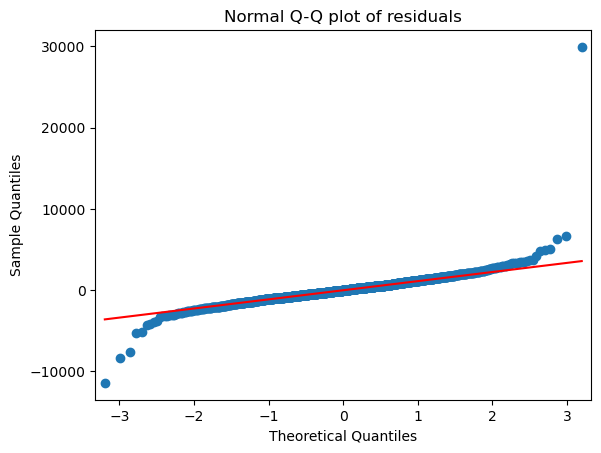

In [60]:
import statsmodels.api as sm
sm.qqplot(findcarpred['Error'],line='q') # line = 45 to draw the diagnoal line
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [61]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

In [62]:
myrows = np.arange(df.shape[0])
myinfluence = np.round(c, 3) # y value

In [63]:
myrows

array([   0,    1,    2, ..., 1433, 1434, 1435])

In [64]:
myinfluence

array([0.05 , 0.075, 0.074, 0.034, 0.059, 0.028, 0.017, 0.016, 0.014,
       0.014, 0.01 , 0.024, 0.005, 0.003, 0.002, 0.002, 0.001, 0.   ,
       0.001, 0.   , 0.001, 0.002, 0.   , 0.   , 0.   , 0.001, 0.002,
       0.001, 0.033, 0.006, 0.001, 0.009, 0.002, 0.001, 0.013, 0.   ,
       0.004, 0.   , 0.008, 0.008, 0.007, 0.011, 0.014, 0.013, 0.054,
       0.015, 0.025, 0.045, 0.199, 0.062])

In [65]:
## Below is for leverage cutoff
n = df.shape[0]
k = df.shape[1]
leverage_cutoff = 3*((k + 1)/n)
print(leverage_cutoff)

0.020891364902506964


In [66]:
# obtain Cook's distance 
model_cooksd = model.get_influence().cooks_distance[0]

# get length of df to obtain n
n= df.shape[0]
critical_d = 4/n
print(n, critical_d)

1436 0.002785515320334262


In [67]:
print('Critical Cooks distance:', critical_d)
out_d = model_cooksd > critical_d
out_d

Critical Cooks distance: 0.002785515320334262


array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True,  True, False,  True, False, False,  True, False,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True])